### Import Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [212]:
### Project Link: https://www.kaggle.com/code/muhammedaliyilmaz/monthly-forecast-until-2035-with-lstm-model

### Data Loading

In [127]:
csv_PATH = [ "Data/TM_1950-03-01_2025-01-31.csv",
             "Data/TM_1950-03-01_2025-02-07.csv",
             "Data/TM_1950-03-01_2025-02-18.csv",
             "Data/TM_1950-03-01_2025-02-24.csv" ]

In [151]:
df_all = []

for file_path in tqdm(csv_PATH, desc="Reading CSV files"):
    df = pd.read_csv(file_path)
    try:
        df = pd.read_csv(file_path)
        df["Date"] = pd.to_datetime(df[f"Date"])
        df_all.append(df)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

df = pd.concat(df_all, ignore_index=True)
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(10)

Reading CSV files: 100%|██████████| 4/4 [00:00<00:00, 48.31it/s]

Error loading Data/TM_1950-03-01_2025-02-24.csv: 'Date'


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,3.344743,3.291227,3.291227,2.296798,41109
1,1980-03-17,0.000000,3.344743,3.291227,3.291227,2.296797,41109
2,1980-03-17,0.000000,3.344743,3.291227,3.291227,2.296798,41109
3,1980-03-18,0.000000,3.358122,3.304606,3.304606,2.306133,9343
4,1980-03-18,0.000000,3.358122,3.304606,3.304606,2.306134,9343
5,1980-03-18,0.000000,3.358122,3.304606,3.304606,2.306134,9343
6,1980-03-19,3.304606,3.304606,3.304606,3.304606,2.306134,0
7,1980-03-19,3.304606,3.304606,3.304606,3.304606,2.306134,0
8,1980-03-19,3.304606,3.304606,3.304606,3.304606,2.306133,0
9,1980-03-20,0.000000,3.358122,3.304606,3.304606,2.306134,10277


### Data Exploration

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33952 entries, 0 to 33951
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       33952 non-null  datetime64[ns]
 1   Open       33952 non-null  float64       
 2   High       33952 non-null  float64       
 3   Low        33952 non-null  float64       
 4   Close      33952 non-null  float64       
 5   Adj Close  33952 non-null  float64       
 6   Volume     33952 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.8 MB


In [158]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,33952,33952.000000,33952.000000,33952.000000,33952.000000,33952.000000,3.395200e+04
mean,2002-08-16 19:19:46.710650368,68.235488,72.750386,71.914646,72.327425,63.875637,2.151064e+05
min,1980-03-17 00:00:00,0.000000,3.237711,3.237711,3.237711,2.259450,0.000000e+00
25%,1991-05-24 00:00:00,0.000000,27.789255,27.582645,27.582645,19.248672,1.353000e+04
50%,2002-08-13 00:00:00,66.110001,66.800003,65.570000,66.220001,50.733988,9.210000e+04
75%,2013-11-06 06:00:00,114.627502,115.182501,113.892500,114.510002,105.005016,2.932000e+05
max,2025-02-14 00:00:00,255.000000,255.229996,253.589996,254.770004,254.770004,1.858270e+07
std,NaN,56.085965,51.797619,51.218346,51.538339,52.552951,3.871191e+05


In [163]:
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n {missing_values}")

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Data Cleaning and Preprocessing

In [164]:
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)
print(f"Missing values after cleaning:\n {df.isnull().sum()}")

Missing values after cleaning:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


/tmp/ipykernel_32125/3870195745.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


### Data Visualizations

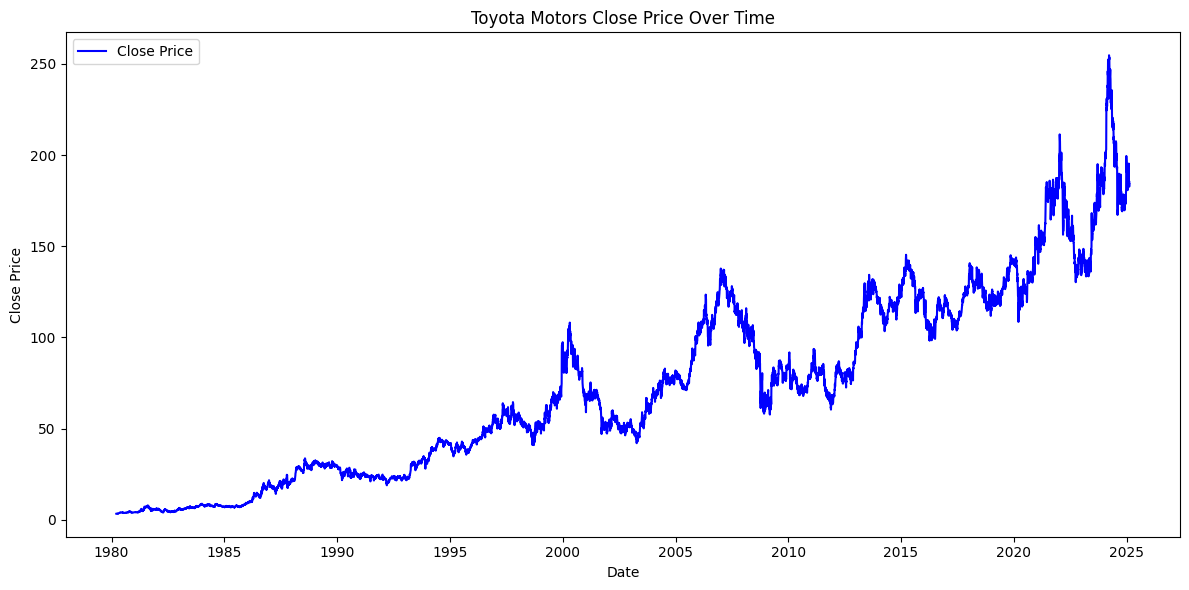

In [203]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Toyota Motors Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()

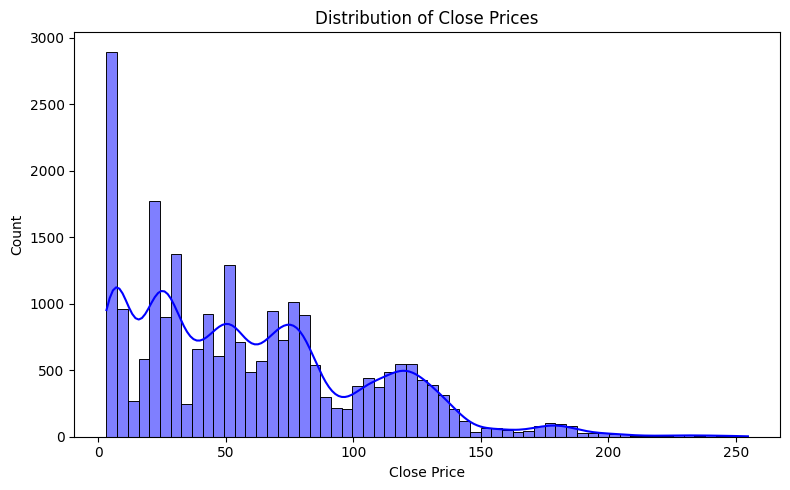

In [190]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], kde=True, color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.tight_layout()

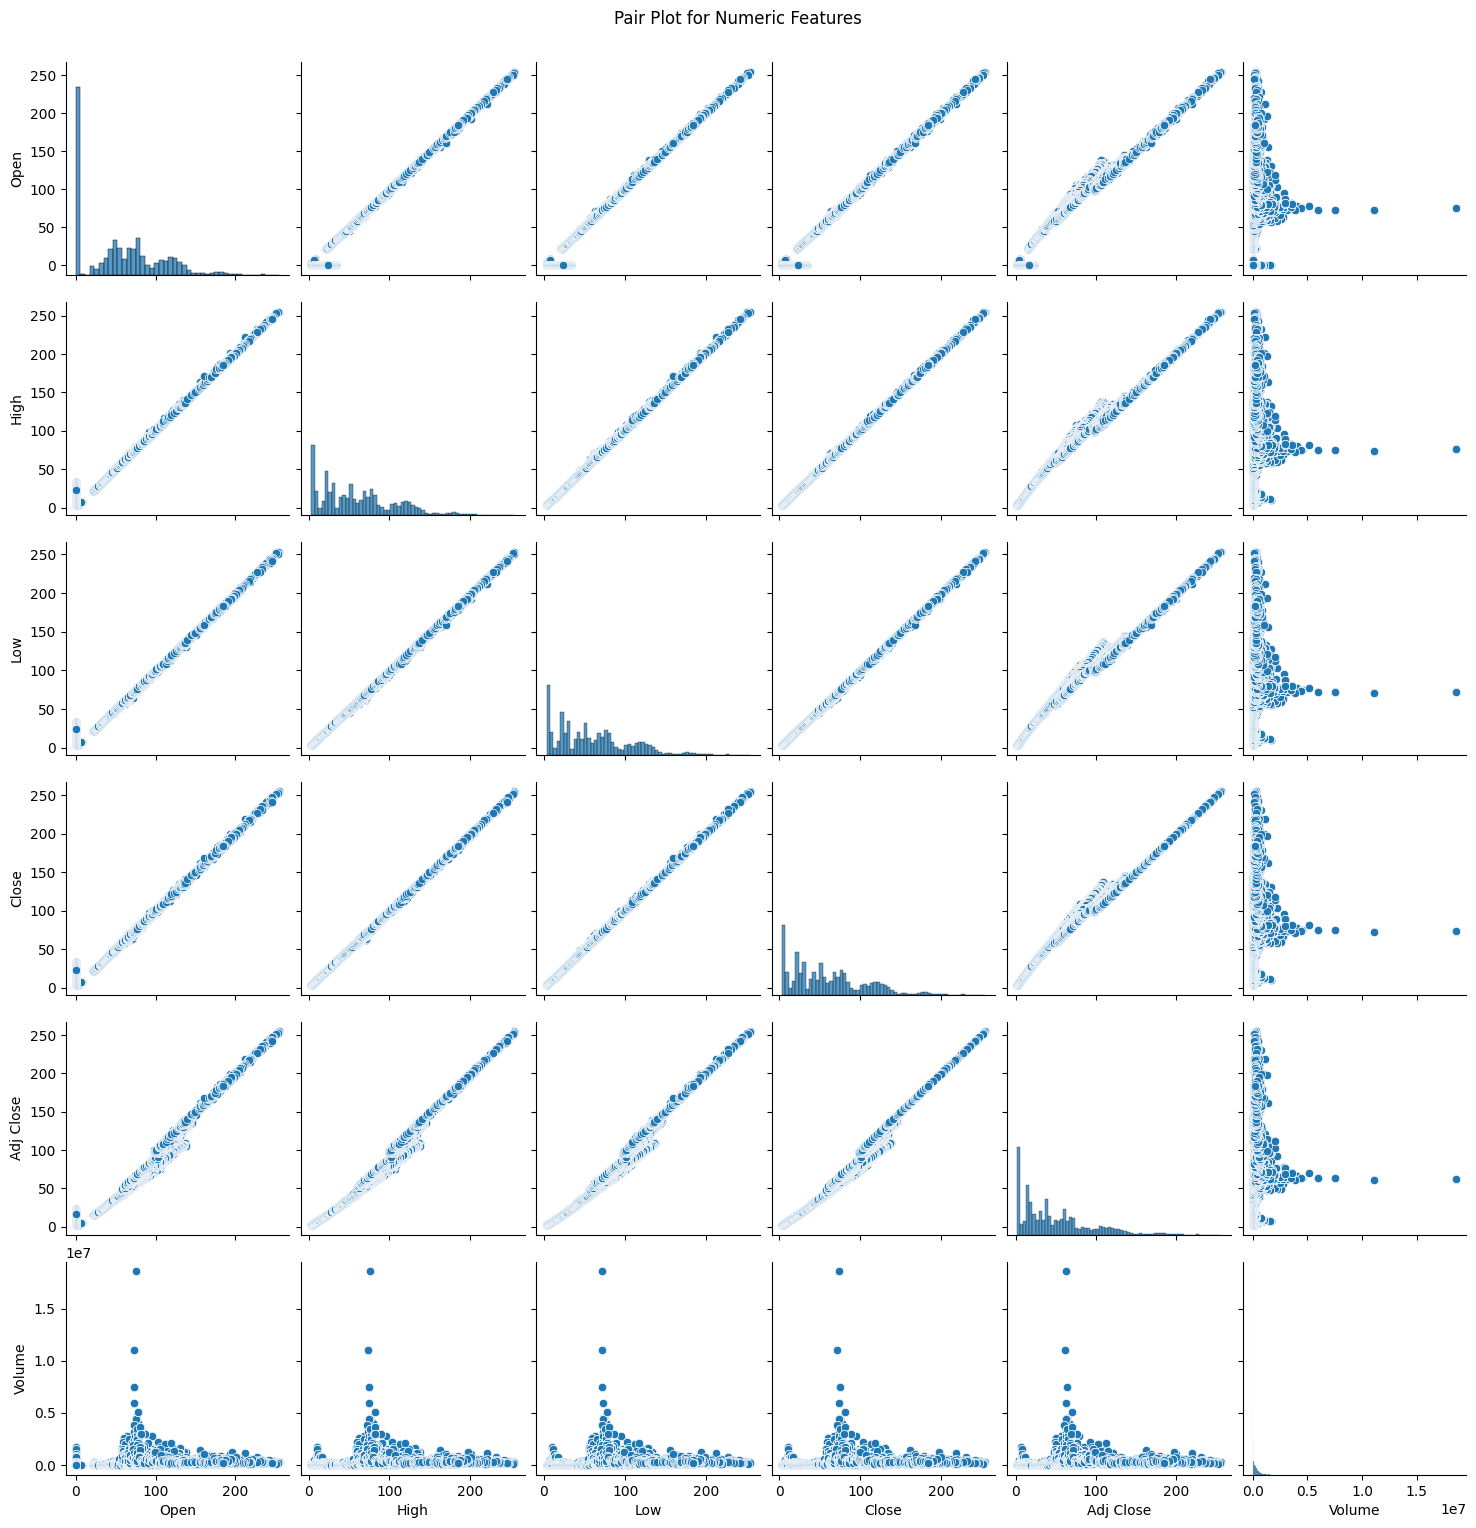

In [206]:
# Pair Plot for numeric features
numeric_df = df.select_dtypes(include=[np.number])

if(numeric_df.shape[1] >= 2):
    sns.pairplot(numeric_df)
    plt.suptitle('Pair Plot for Numeric Features', y=1.02)
    plt.show()

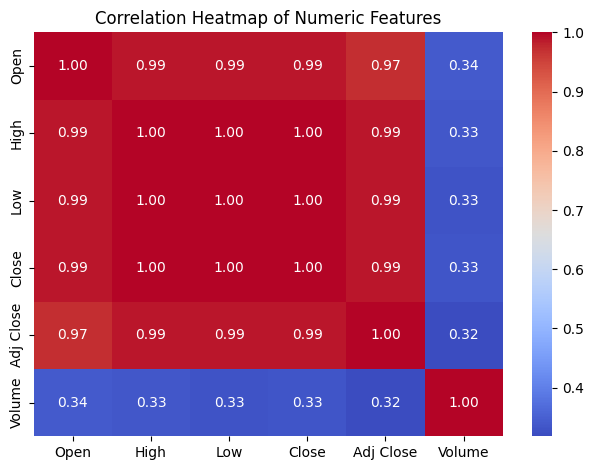

In [ ]:
# Correlation Heatmap (only if there are at least four numeric columns)
if(numeric_df.shape[1] >= 4):
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()